In [19]:
import pickle

# Load the augmented images and labels from the file
with open('../local_data/data_useable_6.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [20]:
augmented_images.shape, augmented_labels.shape

((2200, 512, 512, 3), (2200, 2))

In [21]:
import tensorflow as tf
import numpy as np

augmented_images = np.array(augmented_images, dtype=np.float32)
augmented_labels = np.array(augmented_labels, dtype=np.int32)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [22]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1760, 512, 512, 3), (1760, 2), (440, 512, 512, 3), (440, 2))

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D, Normalization, Flatten
from tensorflow.keras.models import Model

base_model = EfficientNetB0(input_shape=(512, 512, 3), include_top=False, weights='imagenet')

base_model.trainable = False

#Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath='../models/pre_model_2_3.keras', monitor='val_loss', mode='min', save_best_only=True)]

history = model.fit(
  X_train,
  y_train, 
  epochs=10, 
  validation_data=(X_val, y_val),
  callbacks=callbacks
  )

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6056 - loss: 0.6784 - val_accuracy: 0.6364 - val_loss: 0.6726
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6520 - loss: 0.6565 - val_accuracy: 0.6364 - val_loss: 0.6673
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6722 - loss: 0.6491 - val_accuracy: 0.6364 - val_loss: 0.6568
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6427 - loss: 0.6596 - val_accuracy: 0.6364 - val_loss: 0.6576
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6545 - loss: 0.6536 - val_accuracy: 0.6364 - val_loss: 0.6570
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6716 - loss: 0.6467 - val_accuracy: 0.6364 - val_loss: 0.6555
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6607 - loss: 0.6494 - val_accuracy: 0.6364 - val_loss: 0.6593
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6786 - loss: 0.6420 - val_accuracy: 0.6364 - val_loss

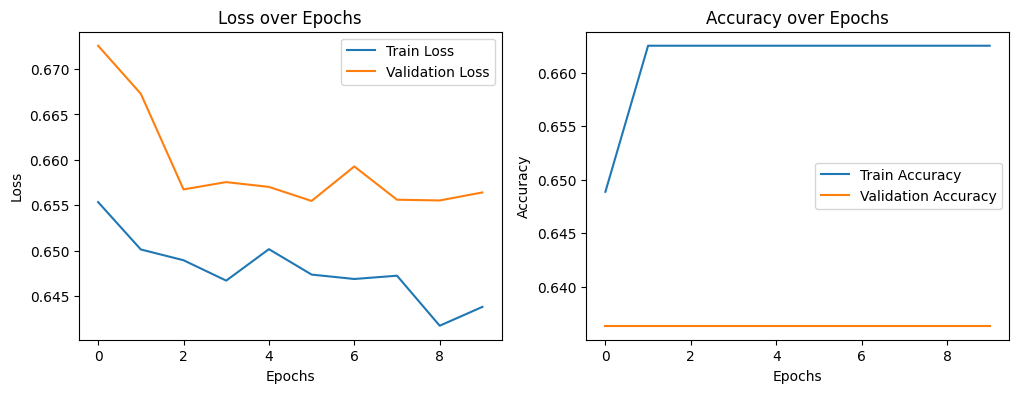

In [29]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [30]:
model.save('../models/pre_model2_6_5.h5')